In [1]:
from jorge_acquire import *
from jorge_model import *
from jorge_prepare import *

# Acquire

In [2]:
links = get_links_to_bills()
df = acquire_bills(links, filename="master_df.csv")

# Prepare

In [3]:
df = prepare_bills_for_processing(df)

/Users/jorgelopez/codeup-data-science/political_parser/jorge_prepare.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bill_text = df.bill_text.apply(bill_trimmer)


In [4]:
# creating a lemmatized column and cleaning the df
df['lem']= df.bill_text.apply(clean_text)

In [5]:
df['model']= df.lem.apply(join)
df.head()

,sponsor,party,bill_text,lem,model
0,"Torres Small, Xochitl",D,\n\n\n \n To require the Secretary of Homelan...,"[require, homeland, security, develop, plan, i...",require homeland security develop plan increas...
1,"Sewell, Terri A.",D,\n\n\n \nTo amend title XI of the Social Secur...,"[amend, xi, social, security, act, clarify, pa...",amend xi social security act clarify parameter...
2,"Finkenauer, Abby",D,\n\n\n \n To repeal the funding authorization ...,"[repeal, funding, authorization, sunset, total...",repeal funding authorization sunset total fund...
3,"Casten, Sean",D,\n\n\n \nTo direct the Federal Energy Regulato...,"[direct, federal, energy, regulatory, commissi...",direct federal energy regulatory commission fi...
4,"LaMalfa, Doug",R,\n\n\n \n To establish a categorical exclusio...,"[establish, categorical, exclusion, electric, ...",establish categorical exclusion electric utili...


In [6]:
# splitting the data
train, X_train, y_train, X_val, y_val, X_test, y_test = split_data(df, 'party')

In [7]:
train.shape

(14858, 5)

In [8]:
def word_freq_new_df(df, clean_text):
    '''
    This function takes in a dataframe and the clean_text function
    to produce a new dataframe of words and word frequency rates.
    '''
    # creating a list of words for bill text and political parties
    all_bill_words = clean_text(' '.join(df['bill_text']))
    democrat_words = clean_text(' '.join(df[df['party'] == 'D']['bill_text']))
    republican_words = clean_text(' '.join(df[df['party'] == 'R']['bill_text']))
    ind_words = clean_text(' '.join(df[df['party'] == 'I']['bill_text']))
    # The value counts for the bill_text and political party words
    bill_counts = pd.Series(all_bill_words).value_counts()
    democrat_counts = pd.Series(democrat_words).value_counts()
    republican_counts = pd.Series(republican_words).value_counts()
    ind_counts = pd.Series(ind_words).value_counts()
    # concatinating the bill_text and political parties into one dataframe
    word_freq = pd.concat([bill_counts, democrat_counts, republican_counts, ind_counts], axis=1)
    word_freq.columns = ['bills', 'demo', 'repub', 'ind']
    # eliminating the most and least frequent words to reveal a more accurate depiction of specific political
    # parties and their respective top words
    word_freq = word_freq.loc[word_freq['bills'] <= 200]
    word_freq = word_freq.loc[word_freq['bills'] >= 25]
    # filling the nan values with zero and making the df columns integers versus floats
    word_freq.fillna(0, inplace=True)
    word_freq = word_freq.astype('int')
    return word_freq

In [9]:
# creating word_freq df
word_freq = word_freq_new_df(train, clean_text)

In [10]:
word_freq.shape

(11829, 4)

In [11]:
word_freq.head(50)

,bills,demo,repub,ind
paul,200,168,32,0
algorithm,200,147,52,1
fundingthe,200,157,41,2
competitor,200,132,67,1
consolidate,200,139,61,0
actthe,200,147,49,4
mac,200,155,42,3
nutrient,200,180,20,0
contaminant,200,174,26,0
librarian,200,169,31,0


In [12]:
def demo_vis(word_freq):
    '''
    This function creates a bar plot of the most common words appearing for democrats.
    '''
    
    #Plot the most frequent democratic words and color by label
    word_freq.sort_values('demo', ascending=False).head(5).plot.bar(figsize=(16, 9))
    plt.title('Most Common Words for Democrats')
    plt.ylabel('Count')
    plt.xlabel('Most Common Words')
    plt.xticks(rotation=45)
    return plt.show()

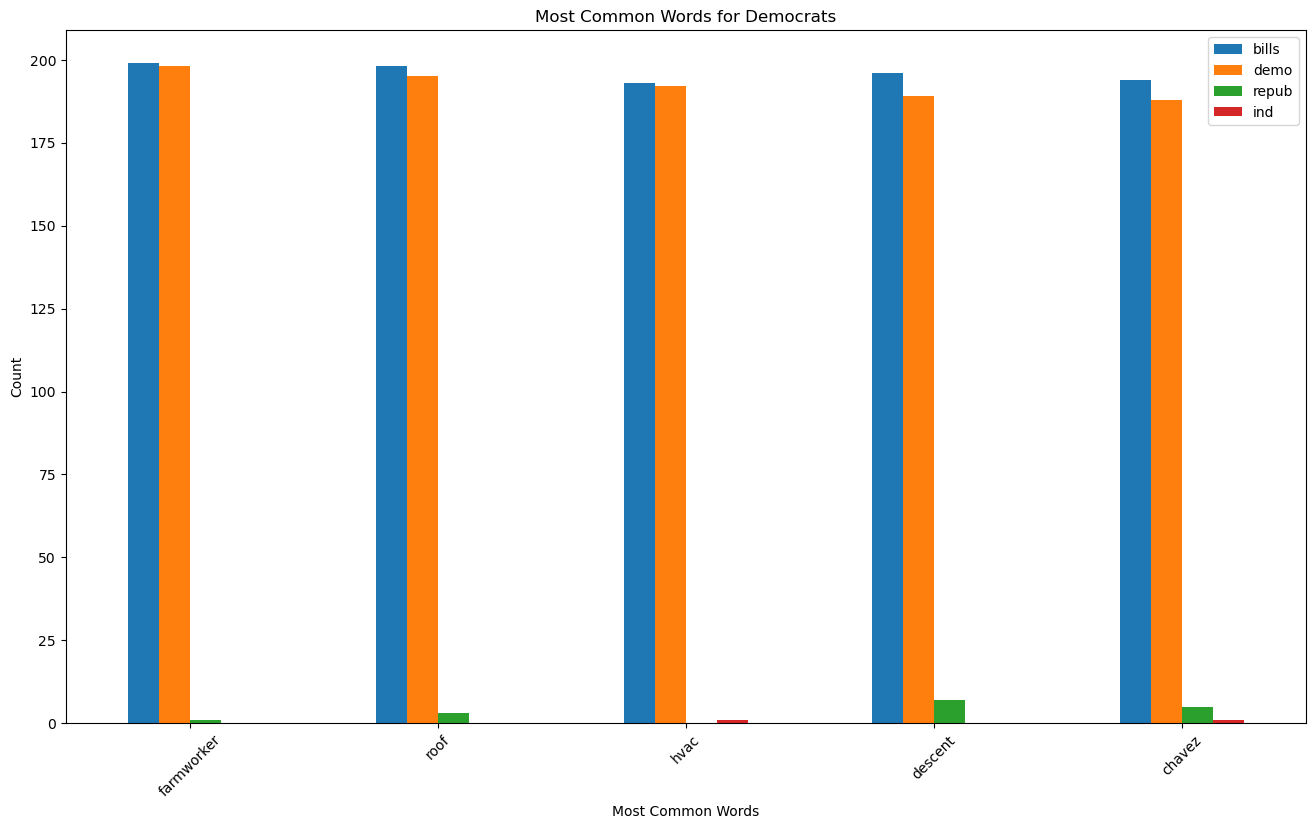

In [13]:
democrat = demo_vis(word_freq)

In [14]:
def repub_vis(word_freq):
    '''
    This function creates a bar plot of the most common words appearing for republicans.
    '''
    
    #Plot the most frequent democratic words and color by label
    word_freq.sort_values('repub', ascending=False).head(5).plot.bar(figsize=(16, 9))
    plt.title('Most Common Words for Republicans')
    plt.ylabel('Count')
    plt.xlabel('Most Common Words')
    plt.xticks(rotation=45)
    return plt.show()

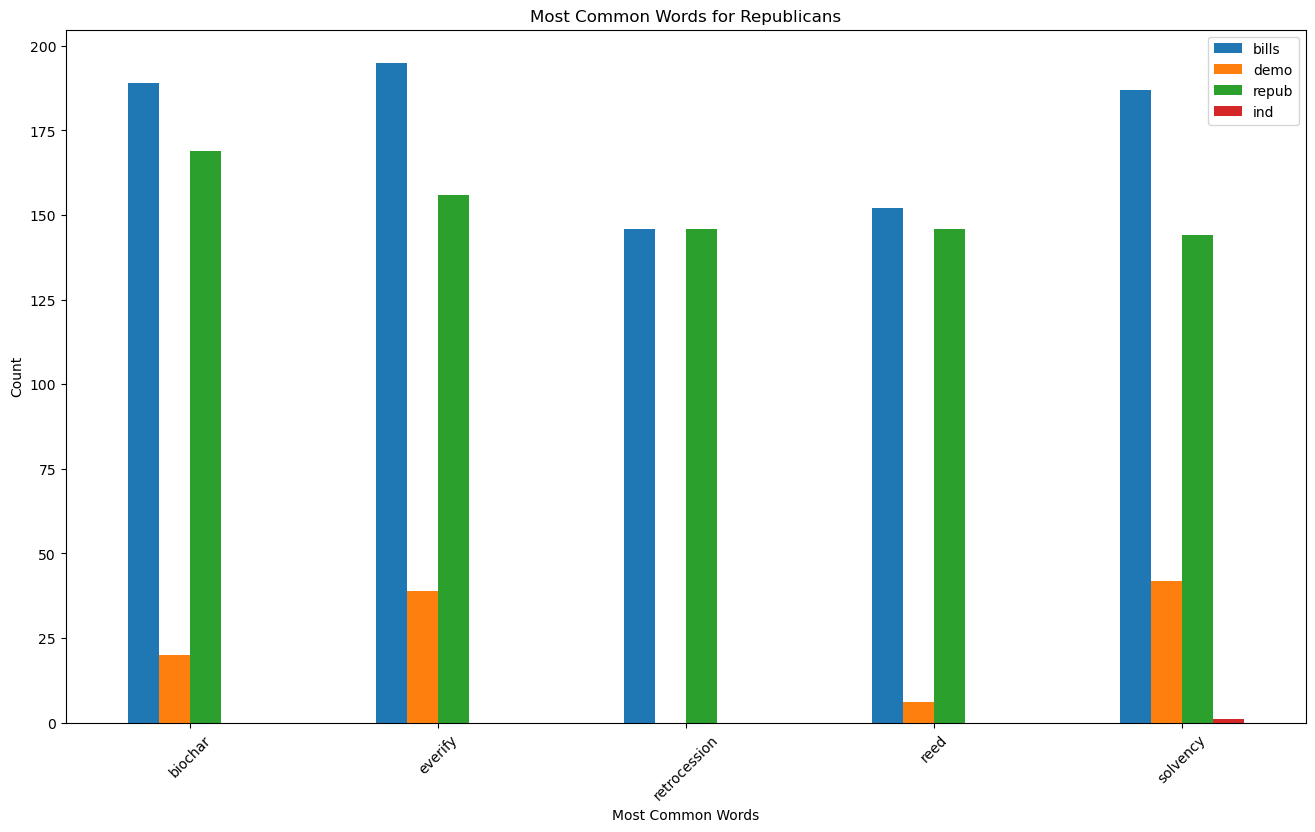

In [15]:
republican = repub_vis(word_freq)

In [17]:
democrat_words = clean_text(' '.join(df[df['party'] == 'D']['bill_text']))
dem_unigrams = pd.Series(nltk.ngrams(democrat_words, 1))
dem_unigrams.head(10)

0     (require,)
1    (homeland,)
2    (security,)
3     (develop,)
4        (plan,)
5    (increase,)
6         (100,)
7     (percent,)
8        (rate,)
9    (scanning,)
dtype: object

In [18]:
dem_bigrams = pd.Series(nltk.ngrams(democrat_words, 2))
dem_bigrams.head(10)

0       (require, homeland)
1      (homeland, security)
2       (security, develop)
3           (develop, plan)
4          (plan, increase)
5           (increase, 100)
6            (100, percent)
7           (percent, rate)
8          (rate, scanning)
9    (scanning, commercial)
dtype: object

In [19]:
dem_trigrams = pd.Series(nltk.ngrams(democrat_words, 3))
dem_trigrams.head(10)

0        (require, homeland, security)
1        (homeland, security, develop)
2            (security, develop, plan)
3            (develop, plan, increase)
4                (plan, increase, 100)
5             (increase, 100, percent)
6                 (100, percent, rate)
7            (percent, rate, scanning)
8         (rate, scanning, commercial)
9    (scanning, commercial, passenger)
dtype: object

In [20]:
dem_quadgrams = pd.Series(nltk.ngrams(democrat_words, 4))
dem_quadgrams.head(10)

0        (require, homeland, security, develop)
1           (homeland, security, develop, plan)
2           (security, develop, plan, increase)
3                (develop, plan, increase, 100)
4                (plan, increase, 100, percent)
5                (increase, 100, percent, rate)
6                (100, percent, rate, scanning)
7         (percent, rate, scanning, commercial)
8       (rate, scanning, commercial, passenger)
9    (scanning, commercial, passenger, vehicle)
dtype: object

In [22]:
republican_words = clean_text(' '.join(df[df['party'] == 'R']['bill_text']))
rep_unigrams = pd.Series(nltk.ngrams(republican_words, 1))
rep_unigrams.head(10)

0      (establish,)
1    (categorical,)
2      (exclusion,)
3       (electric,)
4        (utility,)
5       (rightsof,)
6            (way,)
7        (purpose,)
8        (enacted,)
9         (senate,)
dtype: object

In [23]:
rep_bigrams = pd.Series(nltk.ngrams(republican_words, 2))
rep_bigrams.head(10)

0    (establish, categorical)
1    (categorical, exclusion)
2       (exclusion, electric)
3         (electric, utility)
4         (utility, rightsof)
5             (rightsof, way)
6              (way, purpose)
7          (purpose, enacted)
8           (enacted, senate)
9           (senate, america)
dtype: object

In [24]:
rep_trigrams = pd.Series(nltk.ngrams(republican_words, 3))
rep_trigrams.head(10)

0    (establish, categorical, exclusion)
1     (categorical, exclusion, electric)
2         (exclusion, electric, utility)
3          (electric, utility, rightsof)
4               (utility, rightsof, way)
5               (rightsof, way, purpose)
6                (way, purpose, enacted)
7             (purpose, enacted, senate)
8             (enacted, senate, america)
9                   (senate, america, 1)
dtype: object

In [25]:
rep_quadgrams = pd.Series(nltk.ngrams(republican_words, 4))
rep_quadgrams.head(10)

0    (establish, categorical, exclusion, electric)
1      (categorical, exclusion, electric, utility)
2         (exclusion, electric, utility, rightsof)
3               (electric, utility, rightsof, way)
4                (utility, rightsof, way, purpose)
5                (rightsof, way, purpose, enacted)
6                  (way, purpose, enacted, senate)
7              (purpose, enacted, senate, america)
8                    (enacted, senate, america, 1)
9                        (senate, america, 1, act)
dtype: object

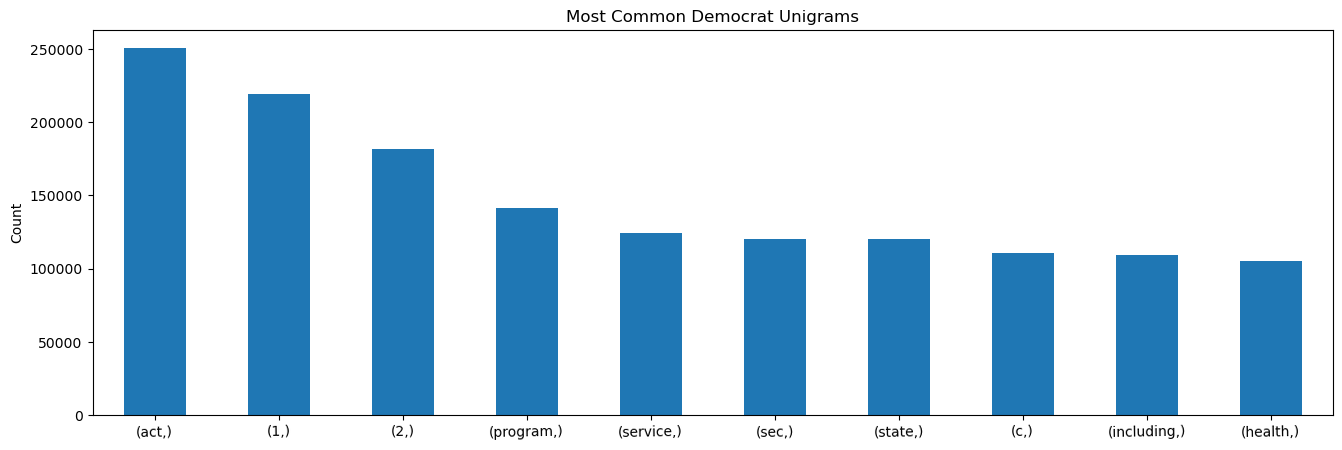

In [44]:
top_dem_unigrams = dem_unigrams.value_counts().head(10)
top_dem_unigrams.plot.bar(rot=1,figsize=(16, 5))
plt.title('Most Common Democrat Unigrams')
plt.ylabel('Count')
plt.show()

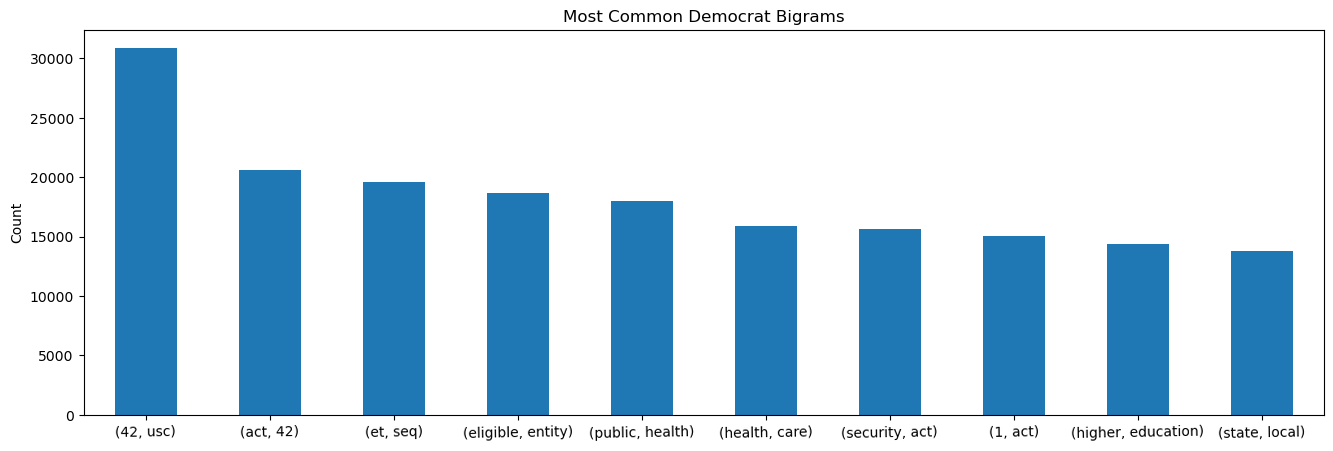

In [43]:
top_dem_bigrams = dem_bigrams.value_counts().head(10)
top_dem_bigrams.plot.bar(rot=1,figsize=(16, 5))
plt.title('Most Common Democrat Bigrams')
plt.ylabel('Count')
plt.show()

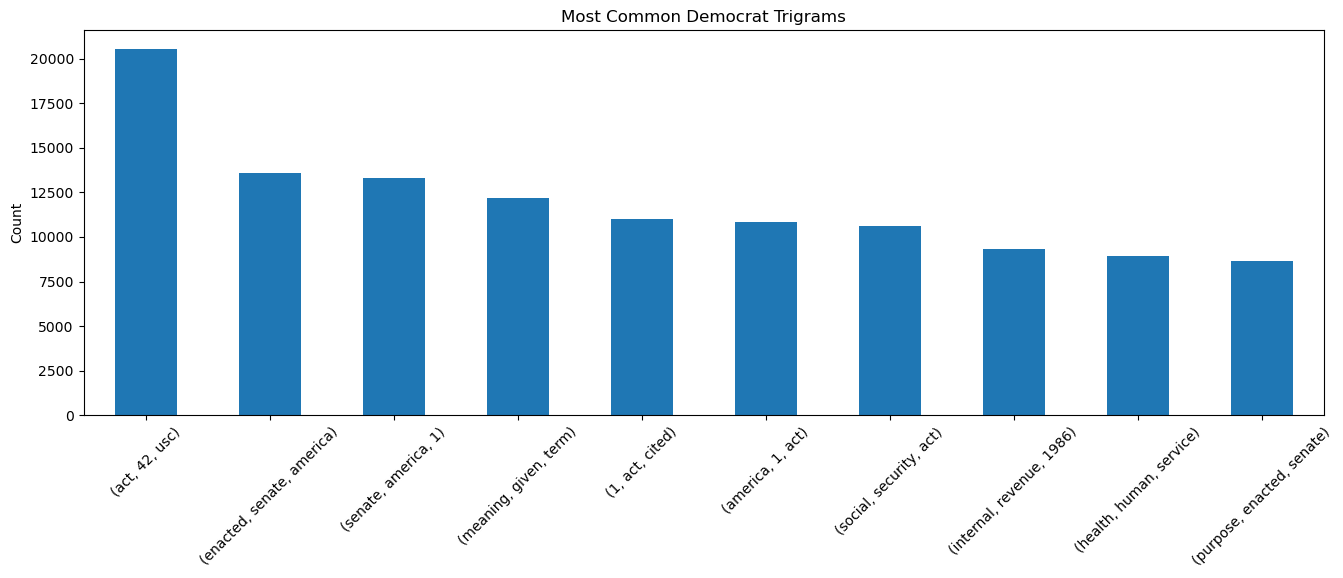

In [45]:
top_dem_trigrams = dem_trigrams.value_counts().head(10)
top_dem_trigrams.plot.bar(rot=45,figsize=(16, 5))
plt.title('Most Common Democrat Trigrams')
plt.ylabel('Count')
plt.show()

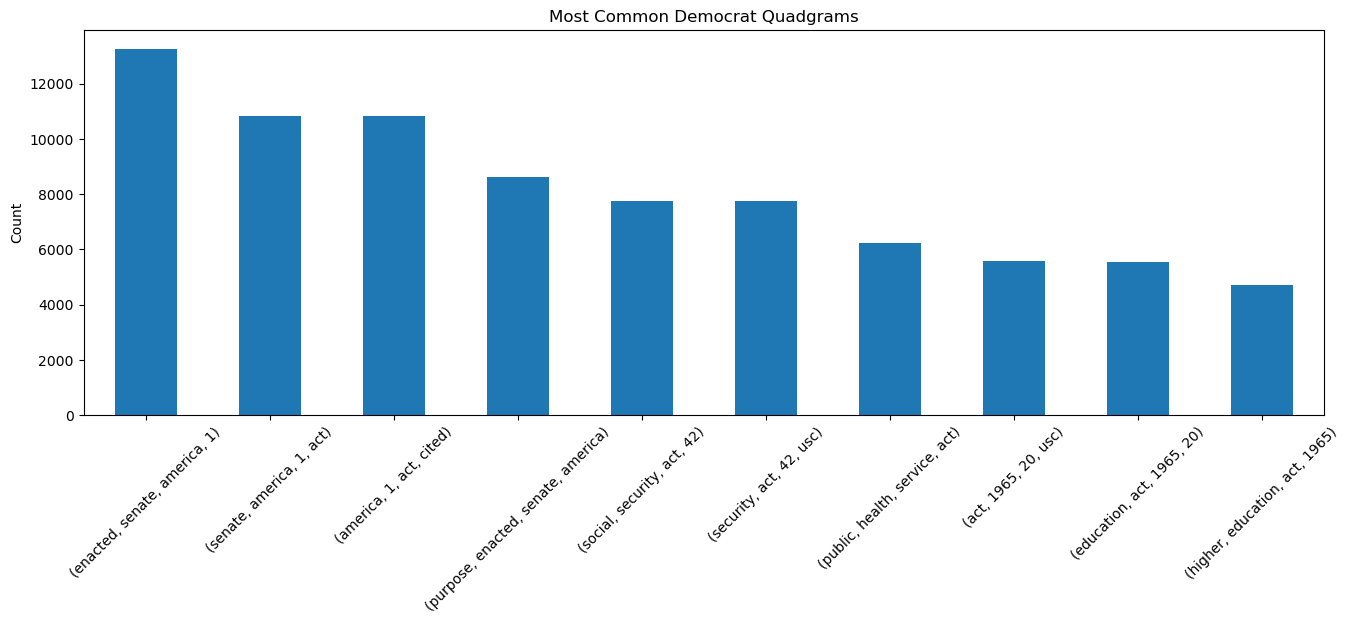

In [46]:
top_dem_quadgrams = dem_quadgrams.value_counts().head(10)
top_dem_quadgrams.plot.bar(rot=45,figsize=(16, 5))
plt.title('Most Common Democrat Quadgrams')
plt.ylabel('Count')
plt.show()

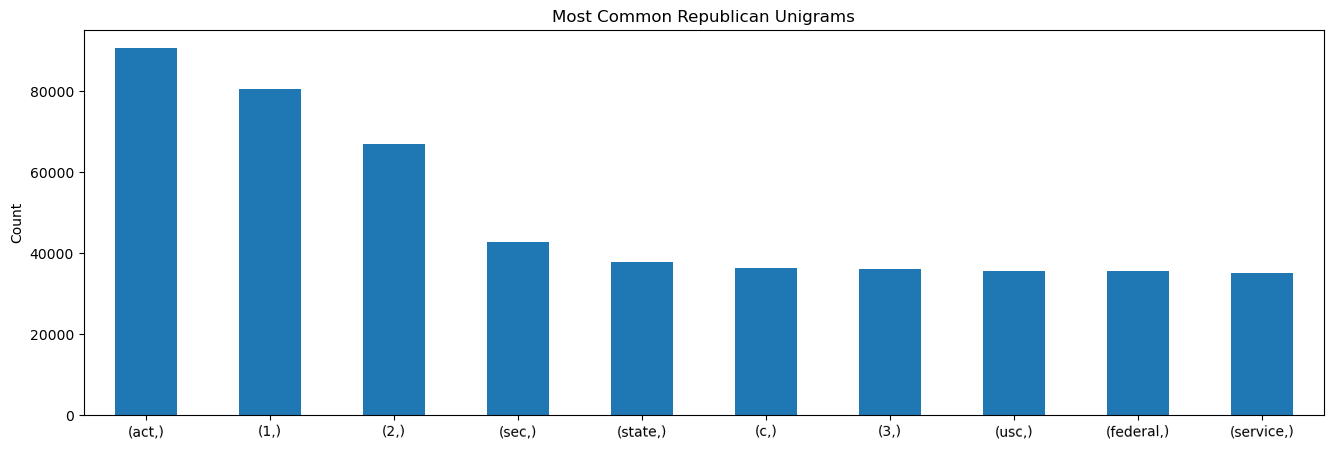

In [52]:
top_rep_unigrams = rep_unigrams.value_counts().head(10)
top_rep_unigrams.plot.bar(rot=1,figsize=(16, 5))
plt.title('Most Common Republican Unigrams')
plt.ylabel('Count')
plt.show()

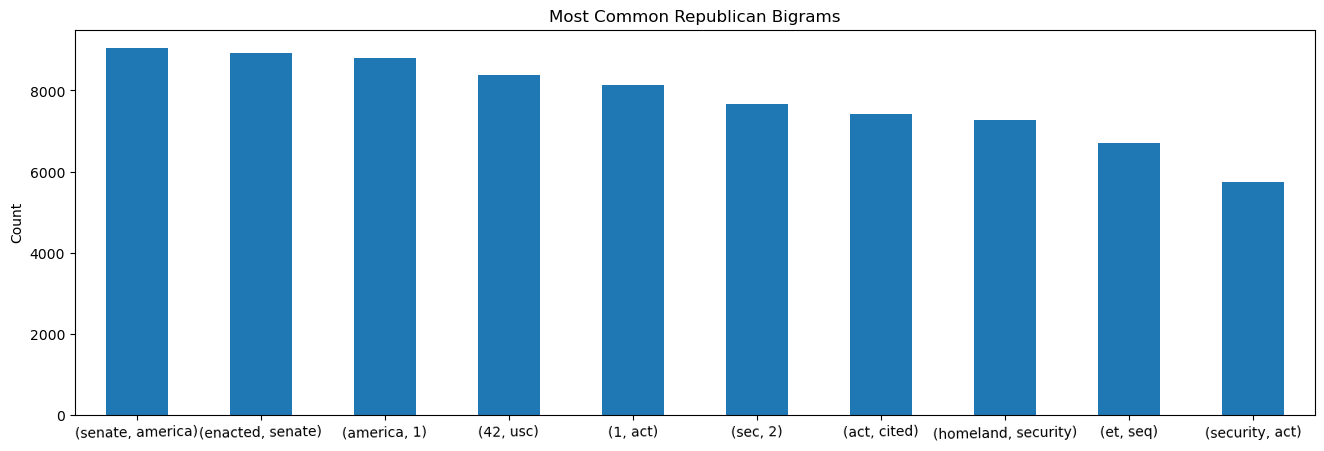

In [48]:
top_rep_bigrams = rep_bigrams.value_counts().head(10)
top_rep_bigrams.plot.bar(rot=1,figsize=(16, 5))
plt.title('Most Common Republican Bigrams')
plt.ylabel('Count')
plt.show()

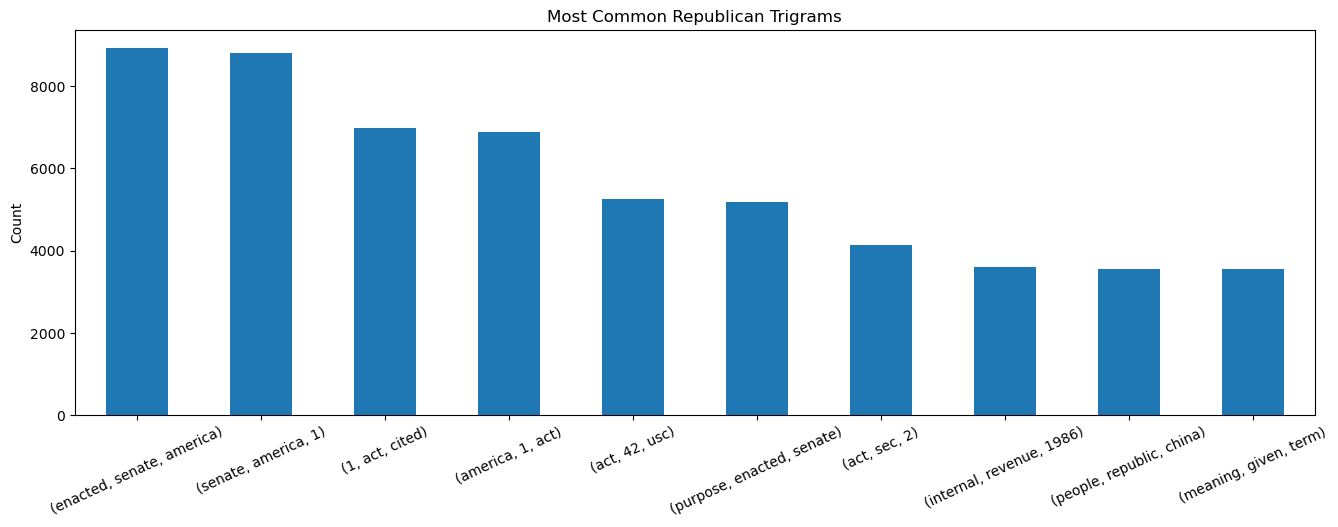

In [54]:
top_rep_trigrams = rep_trigrams.value_counts().head(10)
top_rep_trigrams.plot.bar(rot=25,figsize=(16, 5))
plt.title('Most Common Republican Trigrams')
plt.ylabel('Count')
plt.show()

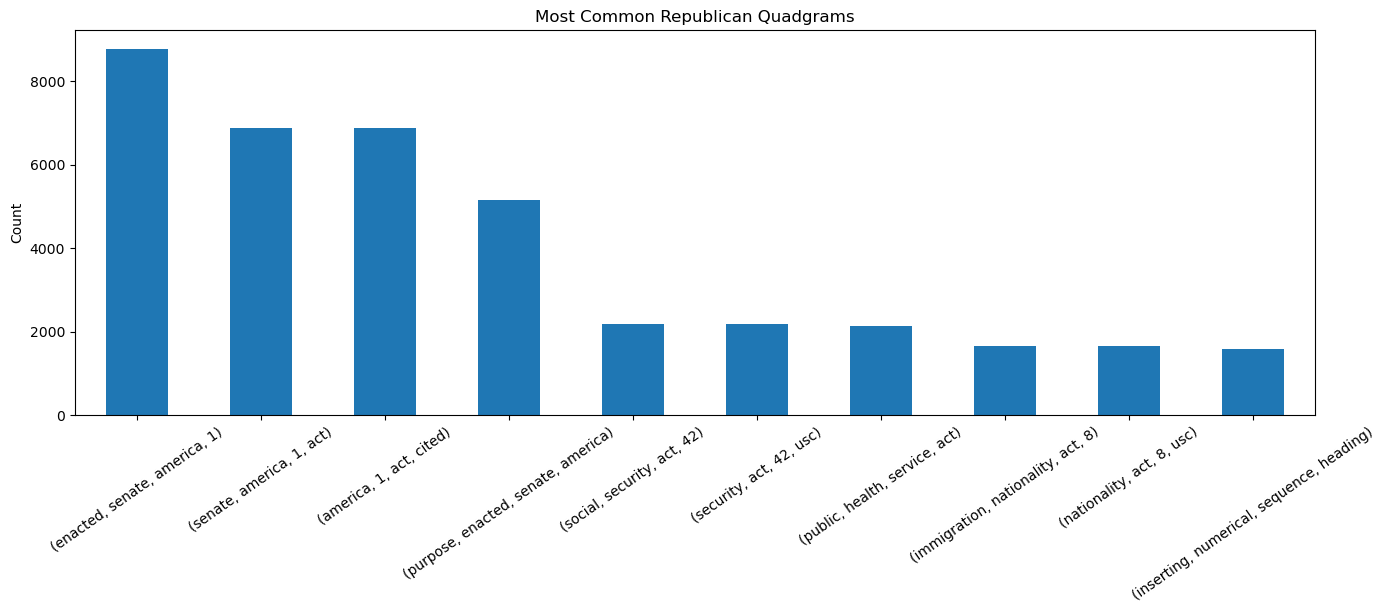

In [53]:
top_rep_quadgrams = rep_quadgrams.value_counts().head(10)
top_rep_quadgrams.plot.bar(rot=35,figsize=(16, 5))
plt.title('Most Common Republican Quadgrams')
plt.ylabel('Count')
plt.show()